# Problemi di Ottimizzazione

Tra le applicazioni più importanti dell'Algebra Lineare c'è senza dubbio l'Ottimizzazione. Infatti, praticamente tutti i problemi *reali* risolvibili computazionalmente possono essere in qualche modo riformulati come problemi di ottimizzazione, partendo dalla Ricerca Operativa (minimizzazione del percorso sottoposto a vincoli, distribuzione di carico, ...), per arrivare all'ingegneria (ottimizzazione di forma, distribuzione di forze nelle strutture, ...), fino al più moderno addestramento di modelli di Intelligenza Artificiali e l'ottimizzazione di parametri in modelli fisici ed economici.

Tutti questi problemi possono essere riscritti come:

$$
\min_{x \in \Omega} f(x),
$$

dove la funzione $f: \Omega \to \mathbb{R}$, detta **funzione obiettivo**, descrive la quantità che si vuole ottimizzare, in funzione di alcuni valori, detti **variabili** o **parametri**, indicati semplicemente con il simbolo di $x$. L'insieme $\Omega$, spesso detto **insieme dei valori accettabili** o **insieme dei vincoli**, descrive sotto quali ipotesi la soluzione $x$ del problema deve sottostare per essere dichiarata *accettabile*. 

Consideriamo, per esempio, un classico problema di Ricerca Operativa in cui si vuole minimizzare la lunghezza del percorso che passa per un determinato insieme di punti (particolarmente interessante per le sue applicazioni nelle reti di distribuzione per la consegna a domicilio, ad esempio, oltre che per le sue interessanti proprietà matematiche), problema spesso noto in letteratura come *problema del Commesso Viaggiatore*.

In questo caso, possiamo immaginare la variabile $x \in \Omega \subset \mathbb{R}^n$ come l'elenco (ordinato) dei nodi che si devono visitare, la funzione obiettivo $f(x)$ come la lunghezza totale del percorso descritta da $x$, ovvero

$$
    f(x) = \sum_{i=1}^{n-1} d(x_i, x_{i+1}),
$$

mentre $\Omega$ rappresenta l'elenco dei vincoli a cui siamo sottoposti, quindi il fatto che tutti i nodi devono essere visitati tutti e solo una volta, oltre che magari alcuni vincoli fisici come la possibilità o meno di raggiungere un certo nodo $x_i$ partendo dal noto $x_j$ (situazione tipica quando i *nodi* rappresentano delle abitazioni che sono da raggiungere, ad esempio, da un dato mezzo di trasporto).

```{note}
Quanto appena descritto rappresenta un procedimento chiamato **modellizzazione matematica**, in cui un processo viene descritto matematicamente assegnando delle variabili e delle funzioni ai vari elementi del processo. Questo tipo di approccio è tipico di praticamente qualunque applicazione, ed è necessario prenderci la mano per capire bene il resto del corso.
```

## Classificazione dei problemi di ottimizzazione
In base alla forma dell'insieme $\Omega$ dei vincoli, oltre che alle proprietà matematiche della funzione obiettivo $f(x)$, i problemi di ottimizzazione si classificano in varie categorie. 

Partendo dalla scelta di $\Omega$, riconosciamo due classi principali:

* Se $\Omega = \mathbb{R}^n$, allora diciamo che il problema è **svincolato** (*unconstrained*, in Inglese)
* Se $\Omega \subset \mathbb{R}^n$, allora diciamo che il problema è **vincolato** (*constrained*, in Inglese)

Nella classe dei problemi vincolati, un caso particolare è dettato dalla situazione in cui $\Omega \subseteq \mathbb{Z}^n$. I problemi di questo tipo sono detti **discreti**. Tutti gli altri vengono in genere detti **continui**, di riflesso.

Per quanto riguarda le proprietà della funzione obiettivo $f(x)$, invece, abbiamo:

* Se $f(x)$ è una funzione almeno derivabile ($f \in C^1(\Omega)$), il problema è detto **smooth**,
* Se $f \notin C^1(\Omega)$, ovvero $f(x)$ non è derivabile in almeno un punto di $\Omega$, allora il problema si dice **non-smooth**.

Ulteriori classificazioni si hanno considerando altre proprietà della funzione obiettivo. Ad esempio:

* Se $f(x) = x^T w$ è una funzione lineare in $x$, allora il problema è detto **lineare**,
* Se $f(x) = x^T A x + x^T b$ è una funzione quadratica in $x$, allora il problema è detto **quadratico**.

```{note}
Le funzioni quadratiche sono particolarmente importanti nell'ambito dell'Algebra Lineare, poiché ad esempio i problemi ai minimi quadrati (già accennati a lezione), ricadono in questa tipologia.
```

<ins>La situazione che consideriamo in questo corso, da ora in avanti, è quella di problemi di ottimizzazione **smooth** e **svincolata**.</ins>

## Un po' di codice
Vediamo ora un po' di codice. Come abbiamo detto, in questo corso andremo sempre a considerare ottimizzazione svincolata, per cui $\Omega = \mathbb{R}^n$, che quindi non andrà definito nell'implementazione.

Per quanto riguarda la funzione $f(x)$, questa viene spesso dichiarata come una normale funzione Python, che prende in input un vettore $x$ che assumiamo **sempre** essere un `ndarray` di `numpy`. La funzione $f(x)$ agirà quindi su questo array $x$ per produrre come risultato **un numero reale**.

Per semplicità, consideriamo la funzione, con $x \in \mathbb{R}$ (i.e. $n=1$):

$$
f(x) = (x-1)^2 + e^x.
$$

In [1]:
# Importiamo le librerie utili
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x) = (x-1)^2 + e^x
def f(x):
    y = (x-1)**2 + np.exp(x)
    
    return y

Essendo una funzione da $\mathbb{R}$ a $\mathbb{R}$, possiamo visualizzarla semplicemente sul piano cartesiano. 

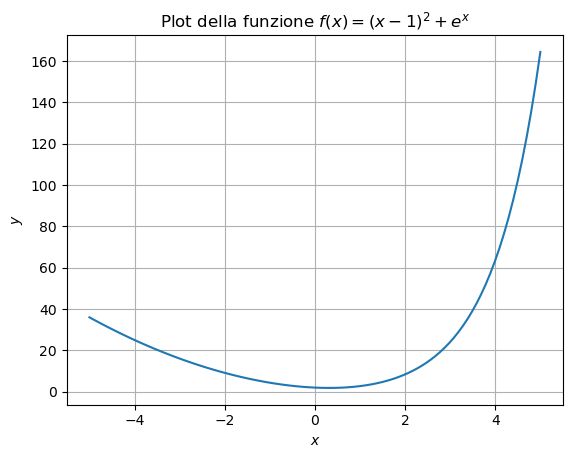

In [2]:
# Definiamo un'intervallo di riferimento
a, b = -5, 5
N = 100 # Numero di punti

# Definiamo una discretizzazione dell'asse x
xx = np.linspace(a, b, N)

# Calcoliamo il rispettivo valore di y
yy = f(xx)

# Plot
plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()

Bisogna qui osservare alcuni punti importanti:

- L'intervallo $[a, b]$ scelto deve essere selezionato dallo studente ed è non vincolante. Chiaramente, la funzione è definita su tutto $\mathbb{R}$ ma il plot può mostrare solo una parte predefinita di asse.
- La discretizzazione dell'asse $x$ e i rispettivi valori dell'asse $y$ sono salvati in variabili `xx` e `yy` (notazione che useremo per tutto il resto del corso). Questo perché esse rappresentato delle vabili *fittizie*, costruite al **solo** scopo di rappresentare il grafico (che, come abbiamo detto nel rispettivo punto del corso) richiede di definire una discretizzazione degli assi.

Come detto, il nostro fine ultimo è quello di risolvere:

$$
min_{x \in \mathbb{R}^n} f(x).
$$

La funzione appena descritta ha come **unico** punto di minimo il valore $x^* \approx 0.31492$. Andiamo a rappresentare tale punto sul grafico.

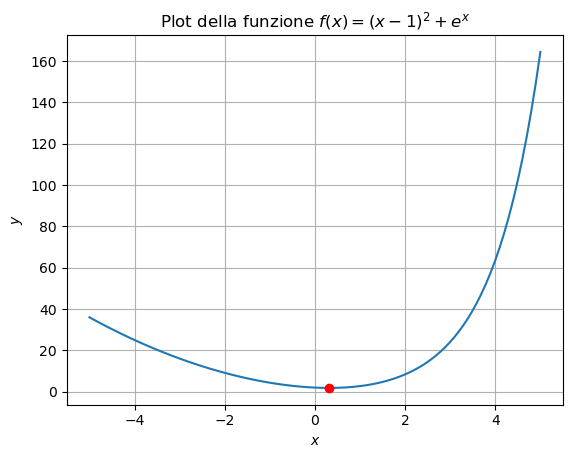

In [3]:
# Definisco il punto di minimo
x_min = 0.31492
y_min = f(x_min)

# Plot
plt.plot(xx, yy, '-')
plt.plot(x_min, y_min, 'ro')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = (x-1)^2 + e^x$')
plt.show()

## Classificazione dei punti di minimo (e massimo)
Chiaramente, non tutte le funzioni sono *belle* come quella appena descritta: per via della sua forma a "U", essa mostra infatti un unico punto di minimo e nessun punto di massimo.

La maggior parte delle funzioni reali avrà forma più simile a quella rappresentata di seguito:

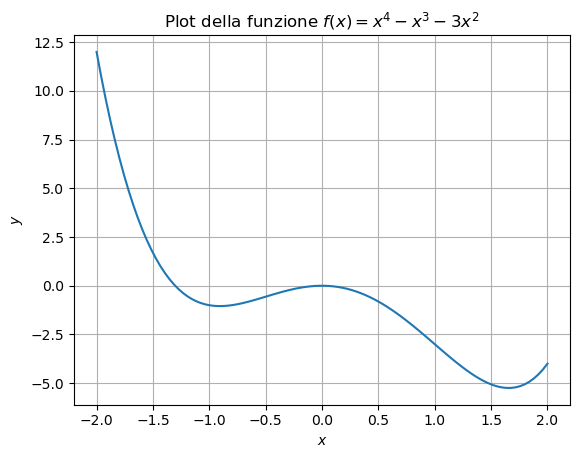

In [28]:
def f(x):
    y = x**4 - x**3 - 3 * x**2
    return y

# Plot
a, b = -2, 2
N = 100

xx = np.linspace(a, b, N)
yy = f(xx)

plt.plot(xx, yy, '-')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plot della funzione $f(x) = x^4 - x^3 - 3 x^2$')
plt.show()

Che presenta vari punti di minimo e un punto di massimo. Chiaramente, quando sviluppiamo un algoritmo di ottimizzazione, puntiamo a trovare il *miglior* minimo possibile (in questo caso, quello vicino ad $x = 1.5$), ma in alcune situazioni possiamo tranquillamente accontentarci del minimo che si trova attorno ad $x = - 1$. Diamo un po' di definizioni con lo scopo di caratterizzare questi punti:

Sia $f: \mathbb{R}^n \to \mathbb{R}$ una funzione. Allora:
* $x^* \in \mathbb{R}^n$ si dice **punto di minimo globale** se $f(x^*) \leq f(x)$, $\forall x \in \mathbb{R}^n$;
* $x^* \in \mathbb{R}^n$ si dice **punto di massimo globale** se $f(x^*) \geq f(x)$, $\forall x \in \mathbb{R}^n$;
* $x^* \in \mathbb{R}^n$ si dice **punto di minimo locale** se $\exists \epsilon > 0$ tale che $f(x^*) \leq f(x)$, $\forall x \in (x^* - \epsilon, x^* + \epsilon)$;
* $x^* \in \mathbb{R}^n$ si dice **punto di massimo locale** se $\exists \epsilon > 0$ tale che $f(x^*) \geq f(x)$, $\forall x \in (x^* - \epsilon, x^* + \epsilon)$;

In particolare, per quanto riguarda la funzione sopra, nell'intervallo $[-2, 2]$ riconosciamo:
* Un punto di minimo globale $x \approx 1.5$,
* 
* Due punti di massimo locale: $x=0$ e $x=2$,
* 

## Estremi relativi e punti stazionari

### Condizioni del primo ordine

### Condizioni del secondo ordine

## Funzioni convesse

**Teorema:** Sia $f \in C^1(\mathbb{R}^n)$, se $x^* \in \mathbb{R}^n$ è punto di minimo di $f(x)$, allora $\nabla f(x) = 0$ (ovvero, $x^*$ è un punto stazionario di $f$).

```{dropdown} *Dimostrazione*

```